In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('ggplot')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
import pmdarima as pm

from sklearn.metrics import mean_absolute_percentage_error as MAPE

import warnings
warnings.filterwarnings("ignore")

In [35]:
# DATA PATH
RAW_DATA_PATH = os.path.join("..","datasets","raw","airline_passengers.csv")
RAW_DATA_PATH

'../datasets/raw/airline_passengers.csv'

In [36]:
air = pd.read_csv(RAW_DATA_PATH, index_col='Month', parse_dates=True, squeeze=True)
air

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: AirPassengers, Length: 144, dtype: int64

### VALORES NULOS?

In [37]:
air.isnull().sum()

0

### VISUALIZACIÓN SERIE TEMPORAL

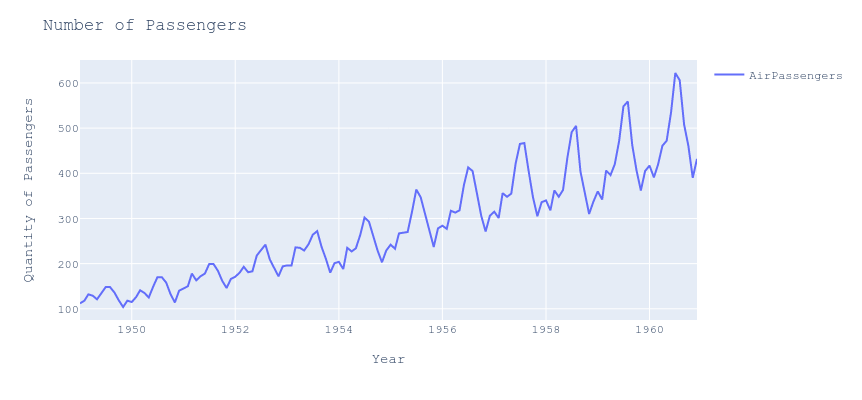

In [38]:
# === SERIE TEMPORAL - VISUALIZATION ===
# =======================================================
fig = px.line(air, height=400)
fig.update_layout(
    title="Number of Passengers",
    xaxis_title="Year",
    yaxis_title="Quantity of Passengers",
    legend_title="",
    height=400,
    font=dict(
        family="Courier New, monospace",
        size=12))
fig.show()

### VALORES REPETIDOS

In [39]:
air[air.index.duplicated()].sum()

0

### ESTADÍSTICOS

In [40]:
air.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: AirPassengers, dtype: float64

### DISTRIBUCIÓN DE PASAJEROS

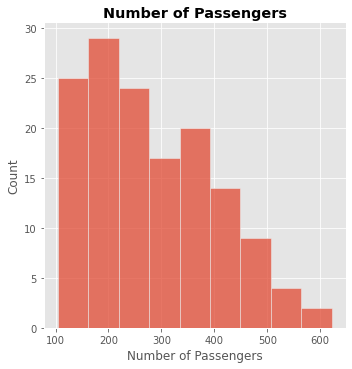

In [41]:
sns.displot(air)
plt.title("Number of Passengers", fontweight='bold')
plt.xlabel("Number of Passengers")
plt.show()

In [46]:
air_df = air.to_frame()
air_df.rename(columns={'AirPassengers':'demand'}, inplace=True)
air_df['year'] = air.index.year
air_df['quarter'] = air.index.quarter
air_df['month'] = air.index.month
air_df

,demand,year,quarter,month
Month,,,,
1949-01-01,112,1949,1,1
1949-02-01,118,1949,1,2
1949-03-01,132,1949,1,3
1949-04-01,129,1949,2,4
1949-05-01,121,1949,2,5
...,...,...,...,...
1960-08-01,606,1960,3,8
1960-09-01,508,1960,3,9
1960-10-01,461,1960,4,10


## VISUALIZACIONES

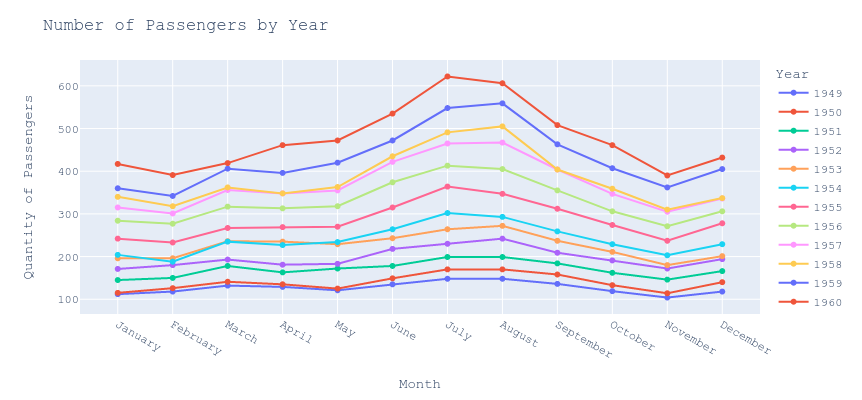

In [47]:
fig = px.line(x="month", y="demand", line_group="year", data_frame=air_df,
             color="year", markers=True)
fig.update_layout(
    title="Number of Passengers by Year",
    xaxis_title="Month",
    yaxis_title="Quantity of Passengers",
    legend_title="Year",
    height=400,
    font=dict(
        family="Courier New, monospace",
        size=12))
fig.update_xaxes(
    ticktext=["January","February","March","April","May","June","July","August",
             "September","October","November","December"],
    tickvals=[1,2,3,4,5,6,7,8,9,10,11,12]
)
fig.show()

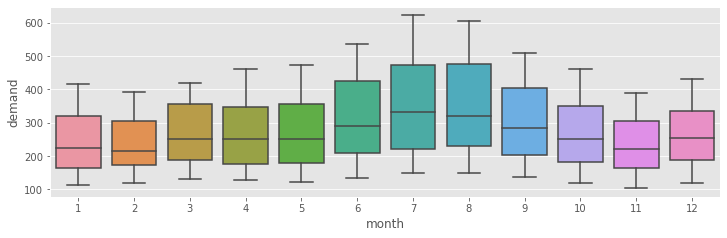

In [49]:
plt.figure(figsize=(12, 3.5))
sns.boxplot(x='month', y='demand', data=air_df)
plt.show()

### CANTIDAD DE PASAJEROS ANUALMENTE

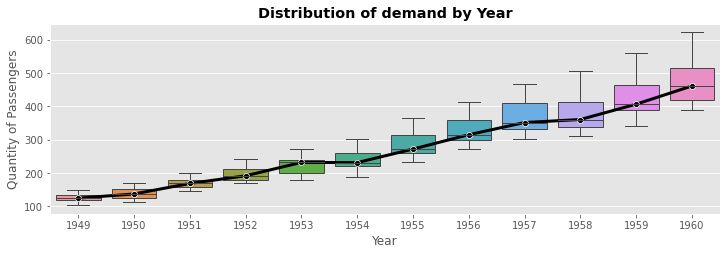

In [63]:
plt.figure(figsize=(12,3.5))
plt.title("Distribution of demand by Year", fontweight='bold')
sns.boxplot(x=air_df.year, y=air_df.demand, linewidth=1)

air_yearly = air_df.groupby('year')['demand'].median()
sns.lineplot(x=air_yearly.index-1949, y=air_yearly.values,
            marker='o', linewidth=3, color='k')
plt.xlabel("Year")
plt.ylabel("Quantity of Passengers")
plt.show()

### CANTIDAD DE PASAJEROS TRIMESTRALMENTE

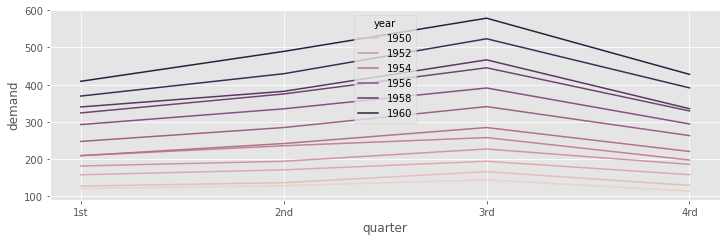

In [60]:
plt.figure(figsize=(12, 3.5))
sns.lineplot(x='quarter', y='demand', hue='year', data=air_df, ci=None)
plt.xticks(ticks=[1, 2, 3, 4], labels=['1st', '2nd', '3rd', '4rd'])
plt.show()

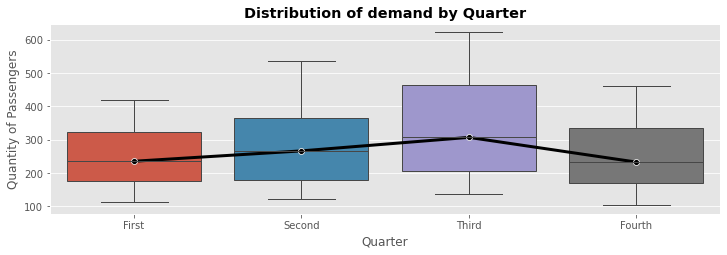

In [62]:
air_quarterly = air_df.groupby('quarter')['demand'].median()

plt.figure(figsize=(12,3.5))
plt.title("Distribution of demand by Quarter", fontweight='bold')
sns.boxplot(x=air_df.quarter, y=air_df.demand, linewidth=1)

sns.lineplot(x=air_quarterly.index-1, y=air_quarterly.values,
            marker='o', linewidth=3, color='k')
plt.xlabel("Quarter")
plt.ylabel("Quantity of Passengers")
plt.xticks(ticks=[0,1,2,3], labels=["First","Second","Third","Fourth"])
#plt.savefig("distbyyaer.jpg")
plt.show()

### CANTIDAD DE PASAJEROS MENSUALMENTE

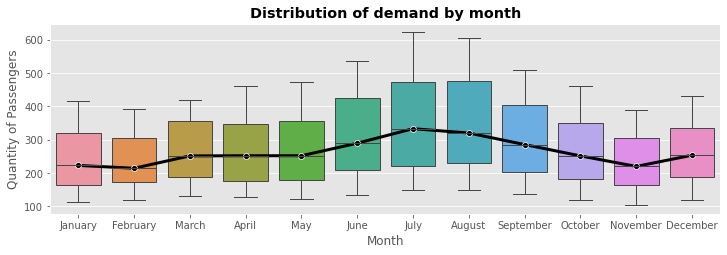

In [61]:
air_monthly = air_df.groupby('month')['demand'].median()

plt.figure(figsize=(12,3.5))
plt.title("Distribution of demand by month", fontweight='bold')
sns.boxplot(x=air_df.month, y=air_df.demand, linewidth=1)

sns.lineplot(x=air_monthly.index-1, y=air_monthly.values,
            marker='o', linewidth=3, color='k')
month_names = ['January','February','March','April','May','June', 'July',
              'August','September','October','November','December']
plt.xticks(ticks=np.arange(12), labels=month_names)
plt.xlabel("Month")
plt.ylabel("Quantity of Passengers")
#plt.savefig("passbymonth.jpg")
plt.show()